In [1]:
from fastai import *
from fastai.vision import *

In [ ]:
folder = 'black'
file = 'black_bears.csv'

In [ ]:
folder = 'teddys'
file = 'teddy.csv'

In [ ]:
folder = 'grizzly'
file = 'grizzly_bear.csv'

In [ ]:
path = Path('./data/bears')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [ ]:
path.ls()

In [ ]:
classes = ['teddys','grizzly','black']

In [ ]:
# download_images(path/file, dest, max_pics=200)

In [ ]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

In [ ]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train='.', valid_pct=0.2, ds_tfms=get_transforms(),
                                  size=224, num_workers=4).normalize(imagenet_stats)

In [ ]:
data.classes

In [ ]:
data.show_batch(rows=3, figsize=(7,8))

In [ ]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

In [ ]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [ ]:
learn.fit_one_cycle(4)

In [ ]:
learn.save('stage-1')

In [ ]:
learn.unfreeze()

In [ ]:
learn.lr_find()

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))

In [ ]:
learn.save('stage-2')

In [ ]:
learn.export()

In [ ]:
learn.load('stage-2')

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

In [ ]:
interp.plot_confusion_matrix()

# cleaning noisey data

In [ ]:
from fastai.widgets import *

In [ ]:
#In order to clean the entire set of images, we need to create a new dataset without the split
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

In [ ]:
#Then we create a new learner to use our new databunch with all the images.

learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

learn_cln.load('stage-2');



In [ ]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

In [ ]:
# Don't run this in google colab or any other instances running jupyter lab.
# If you do run this on Jupyter Lab, you need to restart your runtime and
# runtime state including all local variables will be lost.
ImageCleaner(ds, idxs, path)


In [ ]:
ds, idxs = DatasetFormatter().from_similars(learn_cln)

In [ ]:
ImageCleaner(ds, idxs, path, duplicates=True)


# Putting model into production

In [ ]:
data.classes

In [3]:
defaults.device = torch.device('cpu')

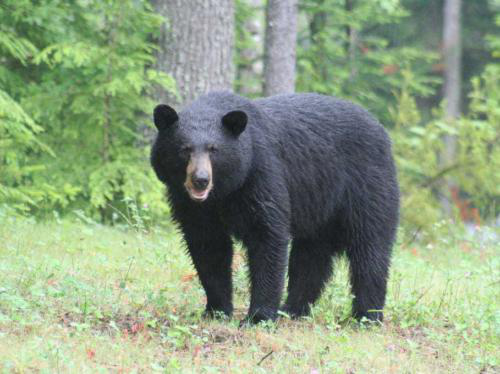

In [10]:
import urllib.request
from PIL import Image
img = Image.open(urllib.request.urlopen('https://actyv-assets.s3.ap-south-1.amazonaws.com/00000020.jpg'))
img
# img = open_image('https://actyv-assets.s3.ap-south-1.amazonaws.com/00000020.jpg')
# img

In [5]:
classes = ['black', 'grizzly', 'teddys']
data2 = ImageDataBunch.single_from_classes(path, classes, ds_tfms=get_transforms(),
                                           size=224).normalize(imagenet_stats)
learn = cnn_learner(data2, models.resnet34)
learn.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (0 items)
x: ImageList

y: CategoryList

Path: /home/hari/machine_learning/pytorch_test/fastai/data/bears;

Valid: LabelList (0 items)
x: ImageList

y: CategoryList

Path: /home/hari/machine_learning/pytorch_test/fastai/data/bears;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): Batch

In [6]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class


Category black

In [ ]:
outputs

# Using load_learn()

# flask code

In [8]:
from fastai import *
from fastai.vision import *
import urllib.request
from PIL import Image
img = Image.open(urllib.request.urlopen('https://actyv-assets.s3.ap-south-1.amazonaws.com/00000020.jpg'))
img
path = Path('/home/hari/machine_learning/pytorch_test/fastai/data/bears/')
learn = load_learner(path)
#learn = pickle.load('/home/hari/machine_learning/pytorch_test/fastai/data/bears/export.pkl')
learn

Learner(data=ImageDataBunch;

Train: LabelList (0 items)
x: ImageList

y: CategoryList

Path: /home/hari/machine_learning/pytorch_test/fastai/data/bears;

Valid: LabelList (0 items)
x: ImageList

y: CategoryList

Path: /home/hari/machine_learning/pytorch_test/fastai/data/bears;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): Batch

In [ ]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

# test for respone for flask

In [ ]:
if pred_class == 'black':
    response = pred_class
    elif pred_class== 'grizzly':
        response = pred_class
        elif pred_class== 'teddy':
            reponse =pred_class
reponse = 'invalid'
    

# Different learning rates

In [ ]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [ ]:
learn.fit_one_cycle(1, max_lr=0.5)

In [ ]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [ ]:
learn.fit_one_cycle(5, max_lr=1e-5)

In [ ]:
learn.recorder.plot_losses()

In [ ]:
learn.predict??
